# Sport Analytics - Prediction Modeling

In [133]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [91]:
#import required data

df = pd.read_csv("/Users/deepak/Documents/DAEN/Sports Analytics/Project/data/combine_data.csv")

In [92]:
# checking the data in the data frame
df.isna().sum()
df.sample(10)
clean_df = df.dropna()
clean_df

player_name_pfr    college_combine    Ht     Wt  X40yd  Vertical  \
0          Alan Reuber          Texas A&M  78.0  323.0   5.49      29.0   
2         Andrew Shull       Kansas State  77.0  265.0   4.90      30.5   
4         Antonio Hall           Kentucky  75.0  317.0   5.54      26.5   
5        Arnold Parker               Utah  74.0  213.0   4.54      35.5   
7         Adrian Jones             Kansas  76.0  296.0   4.97      31.0   
...                ...                ...   ...    ...    ...       ...   
5736  Raequan Williams     Michigan State  76.0  308.0   5.04      25.5   
5746  Scottie Phillips        Mississippi  68.0  209.0   4.56      30.0   
5770     Tristan Wirfs               Iowa  77.0  320.0   4.85      36.5   
5780    Willie Gay Jr.  Mississippi State  73.0  243.0   4.46      39.5   
5783         Zack Baun          Wisconsin  74.0  238.0   4.65      32.5   

      Bench  Broad_Jump  X3Cone  Shuttle pos_combine  combine_yr  Pick  \
0      26.0        98.0    7.95     4.91          OG        2004   300   
2      16.0       107.0    7.46     4.28          DE        2004   300   
4      27.0       101.0    8.12     4.55          OG        2004   300   
5      18.0       120.0    6.98     4.12           S        2004   300   
7      27.0       114.0    7.81     4.58          OT        2004   132   
...     ...         ...     ...      ...         ...         ...   ...   
5736   17.0       101.0    7.72     4.78          DL        2020   300   
5746   29.0       114.0    7.40     4.53          RB        2020   300   
5770   24.0       121.0    7.65     4.68          OL        2020    13   
5780   21.0       136.0    7.08     4.30          LB        2020    63   
5783   24.0       115.0    7.00     4.31          LB        2020    74   

      Career_AV_New  draft_dummy  
0                 0            0  
2                 0            0  
4                 0            0  
5                 0            0  
7                14            1  
...             ...          ...  
5736              0            0  
5746              0            0  
5770             12            1  
5780              5            1  
5783              3            1  

[2449 rows x 15 columns]

# Creating Models to Predict the Response Variable - 
### 1) Pick - Overall number of pick
### 2) Career_AV_New - Career total Approximate Value of player*
### 3) draft_dummy - Binary Variable

# Section 1 : ML Models

### Model 1 - Random Forest Regressor to Predict "Pick"

In [93]:
# Splitting the data for Train and Test - 80% train, 20% test
X = clean_df.iloc[:, [2,3,4,5,6,7,8,9,11]].values
y = clean_df.iloc[:, 12].values
X

array([[  78.  ,  323.  ,    5.49, ...,    7.95,    4.91, 2004.  ],
       [  77.  ,  265.  ,    4.9 , ...,    7.46,    4.28, 2004.  ],
       [  75.  ,  317.  ,    5.54, ...,    8.12,    4.55, 2004.  ],
       ...,
       [  77.  ,  320.  ,    4.85, ...,    7.65,    4.68, 2020.  ],
       [  73.  ,  243.  ,    4.46, ...,    7.08,    4.3 , 2020.  ],
       [  74.  ,  238.  ,    4.65, ...,    7.  ,    4.31, 2020.  ]])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [96]:
score = regressor.score(X_train, y_train)
print("R-squared:", score)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared: 0.8886949716711293
Mean Absolute Error: 81.21085714285714
Mean Squared Error: 9025.662616391837
Root Mean Squared Error: 95.00348739068392


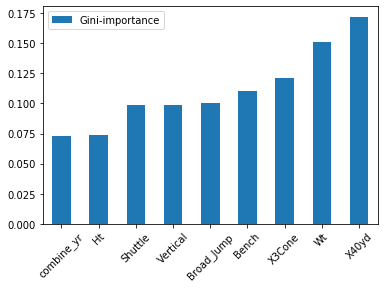

In [97]:
feats = {}
for feature, importance in zip(clean_df.iloc[:, [2,3,4,5,6,7,8,9,11]].columns, regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

## X40yd followed by Wt and X3Cone are the most important variables in predicting Pick

##  Model 2 - Random Forest Regressor to Predict "Career_AV_New"

R-squared: 0.8736597349627359
Mean Absolute Error: 12.864542857142858
Mean Squared Error: 302.77048533061225
Root Mean Squared Error: 17.40030129999513


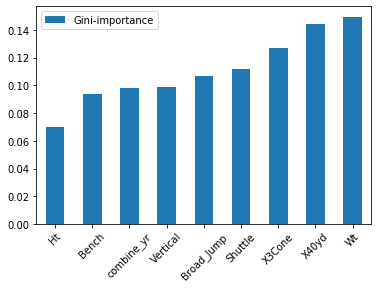

In [98]:
# Splitting the data for Train and Test - 80% train, 20% test
X = clean_df.iloc[:, [2,3,4,5,6,7,8,9,11]].values
y = clean_df.iloc[:, 13].values
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


score = regressor.score(X_train, y_train)
print("R-squared:", score)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

feats = {}
for feature, importance in zip(clean_df.iloc[:, [2,3,4,5,6,7,8,9,11]].columns, regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

## Wt, followed by X40yd and X3Cone are the most important variables in predicting Pick

##  Model 3 - Random Forest Regressor to Predict "draft_dummy"

In [125]:
# Splitting the data for Train and Test - 80% train, 20% test
X = clean_df.iloc[:, [2,3,4,5,6,7,8,9,11]].values
y = clean_df.iloc[:, 14].values
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test) 
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print("roc_value", roc_value)

roc_value 0.6811152431465789


[[ 40 101]
 [ 46 303]]


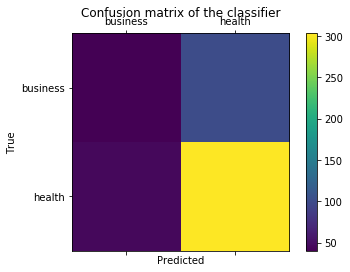

In [123]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, rf_predictions)
print(conf_mat)

labels = ['business', 'health']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Section 2: Clustering

In [128]:
X = np.array(clean_df[['Ht','Wt','X40yd','Vertical','Bench','Broad_Jump','X3Cone','Shuttle']])
Y = np.array(clean_df['pos_combine'])
scaler = StandardScaler()
#fitting scaler to the feature
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [129]:
#Use the .transform() method to transform the features into a scaled version.
scaled_features = scaler.transform(X)

In [130]:
#Converting the scaled features to a dataframe and check the dataframe to make sure the scaling worked.
df_feat = pd.DataFrame(scaled_features) 
df_feat

0         1         2         3         4         5         6  \
0     1.488960  1.583091  2.212983 -0.846798  0.774667 -1.686844  1.627399   
1     1.116948  0.312148  0.340787 -0.497083 -0.793493 -0.736539  0.442986   
2     0.372923  1.451614  2.371644 -1.429656  0.931483 -1.370075  2.038317   
3     0.000911 -0.827318 -0.801570  0.668633 -0.479861  0.636123 -0.717254   
4     0.744936  0.991445  0.562912 -0.380512  0.931483  0.002587  1.288995   
...        ...       ...       ...       ...       ...       ...       ...   
2444  0.744936  1.254399  0.785037 -1.662800 -0.636677 -1.370075  1.071450   
2445 -2.231161 -0.914969 -0.738106 -0.613655  1.245116  0.002587  0.297956   
2446  1.116948  1.517353  0.182126  0.901776  0.461035  0.741713  0.902248   
2447 -0.371101 -0.169934 -1.055427  1.601206 -0.009413  2.325554 -0.475538   
2448  0.000911 -0.279498 -0.452517 -0.030797  0.461035  0.108176 -0.668911   

             7  
0     1.890918  
1    -0.478981  
2     0.536690  
3    -1.080860  
4     0.649542  
...        ...  
2444  1.401891  
2445  0.461455  
2446  1.025717  
2447 -0.403746  
2448 -0.366129  

[2449 rows x 8 columns]

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1836, 8)
(613, 8)


In [134]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [135]:
# making prediction
y_pred = knn.predict(X_test)

In [136]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.4632952691680261
